# Semana 13: ¿Cómo sabemos si nuestras predicciones son realmente buenas?

## SESIÓN 1: ¿Qué significa que un análisis sea "confiable"? (50 min)
**Pregunta guía**: ¿Cómo evaluamos la calidad de las decisiones de nuestros "entrenadores digitales"?

### ¿Has notado cómo evalúan a los entrenadores de fútbol?

Imagínate que eres periodista deportivo y debes evaluar a dos entrenadores del Barcelona después de 10 partidos:

**Entrenador A**: 
- Ganó 8 partidos, perdió 2
- Sus predicciones de alineación fueron correctas en 8/10 casos

**Entrenador B**:
- Ganó 7 partidos, perdió 3  
- Sus predicciones de alineación fueron correctas en 7/10 casos

**Pregunta reflexiva**: ¿Es suficiente solo mirar cuántos aciertos tuvo cada uno? ¿Qué otros aspectos importan?

### Más allá de solo contar aciertos

Cuando evaluamos predicciones deportivas, necesitamos considerar:
- ¿Qué tipo de errores cometió?
- ¿Los errores fueron en decisiones importantes o menores?
- ¿Qué tan seguro estaba de sus predicciones?

Hoy aprenderemos a medir estas cosas de manera precisa.

### Tipos de errores en las predicciones deportivas

Imagínate que tu "entrenador digital" debe predecir si un jugador será titular o suplente. Puede cometer dos tipos de errores:

**Error Tipo 1: "Falsa Alarma"**
- Predice: "Messi será suplente"
- Realidad: "Messi fue titular"
- ¿Qué tan grave es este error?

**Error Tipo 2: "Se le pasó"**
- Predice: "Ansu Fati será titular"  
- Realidad: "Ansu Fati fue suplente"
- ¿Este error es igual de grave que el anterior?

**Pregunta reflexiva**: ¿Crees que ambos errores tienen la misma importancia? ¿En qué situaciones sería peor un tipo de error que el otro?

### La matriz de confusión: nuestro tablero de análisis

Para entender mejor los errores, los organizamos en una tabla especial que nos muestra:
- ¿Cuántas veces acertamos completamente?
- ¿Cuántas veces nos equivocamos y de qué manera?

Es como tener un reporte detallado del rendimiento de nuestro entrenador.

### Práctica inmediata: Evaluando las decisiones del Barcelona

Vamos a analizar las predicciones de nuestro "entrenador digital" sobre quién debería ser titular en el Barcelona.

**Situación**: Nuestro modelo analizó 15 jugadores y predijo quiénes serían titulares en el próximo partido. Ahora comparamos sus predicciones con lo que realmente pasó.

**Datos que analizaremos:**
- Predicciones del modelo: ¿Quién dijo que sería titular?
- Realidad del partido: ¿Quién realmente fue titular?
- Tipos de aciertos y errores cometidos

**Pregunta guía**: ¿Cómo podemos organizar esta información para entender mejor el rendimiento de nuestro modelo?

In [ ]:
# Importamos las herramientas necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Datos del análisis: predicciones vs realidad
jugadores_barcelona = [
    "Ter Stegen",
    "Balde",
    "Araujo",
    "Kounde",
    "Cancelo",
    "De Jong",
    "Gavi",
    "Pedri",
    "Raphinha",
    "Lewandowski",
    "Ferran Torres",
    "Ansu Fati",
    "Sergi Roberto",
    "Christensen",
    "Marcos Alonso",
]

# 1 = Titular, 0 = Suplente
predicciones_modelo = [
    1,
    1,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
]  # Lo que predijo nuestro modelo
realidad_partido = [
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
]  # Lo que realmente pasó

# Creamos una tabla para ver las comparaciones
analisis = pd.DataFrame(
    {
        "Jugador": jugadores_barcelona,
        "Prediccion_Modelo": predicciones_modelo,
        "Realidad_Partido": realidad_partido,
        "Prediccion_Texto": [
            "Titular" if x == 1 else "Suplente" for x in predicciones_modelo
        ],
        "Realidad_Texto": [
            "Titular" if x == 1 else "Suplente" for x in realidad_partido
        ],
    }
)

print("Análisis de predicciones del Barcelona:")
print(analisis)
print(f"\nTotal de jugadores analizados: {len(analisis)}")

Herramientas cargadas:
- pandas: Para organizar datos
- Predictores: Regresión Logística y Random Forest
- Nuevas formas de medir: precision, recall, f1-score

Todo listo para evaluar nuestros predictores!


### ¿Dónde acertó y dónde se equivocó nuestro modelo?

Mirando la tabla anterior, vamos a clasificar cada caso:

**Pregunta reflexiva**: ¿Puedes identificar qué jugadores fueron predichos correctamente y cuáles incorrectamente?

### Clasificando los resultados:

1. **Acierto Total**: Predijo titular y fue titular (o predijo suplente y fue suplente)
2. **Error Tipo 1**: Predijo suplente pero fue titular
3. **Error Tipo 2**: Predijo titular pero fue suplente

### Creando nuestra matriz de confusión

La matriz de confusión es como un marcador detallado que nos dice:
- ¿Cuántos casos predijimos correctamente?
- ¿Qué tipos de errores cometimos?
- ¿Hay un patrón en nuestros errores?

In [ ]:
# Creamos la matriz de confusión
matriz_confusion = confusion_matrix(realidad_partido, predicciones_modelo)

print("Matriz de Confusión:")
print("Filas = Realidad, Columnas = Predicción")
print(matriz_confusion)

# Vamos a entender qué significa cada número
titulares_reales_predecidos_titulares = matriz_confusion[1, 1]  # Aciertos de titulares
suplentes_reales_predecidos_suplentes = matriz_confusion[0, 0]  # Aciertos de suplentes
titulares_reales_predecidos_suplentes = matriz_confusion[
    1, 0
]  # Error: era titular, dijimos suplente
suplentes_reales_predecidos_titulares = matriz_confusion[
    0, 1
]  # Error: era suplente, dijimos titular

print(f"\n📊 Desglose de resultados:")
print(f"✅ Titulares correctos: {titulares_reales_predecidos_titulares}")
print(f"✅ Suplentes correctos: {suplentes_reales_predecidos_suplentes}")
print(f"❌ Se nos escapó un titular: {titulares_reales_predecidos_suplentes}")
print(
    f"❌ Predijimos titular pero fue suplente: {suplentes_reales_predecidos_titulares}"
)

# Calculamos la precisión total
precision_total = accuracy_score(realidad_partido, predicciones_modelo)
print(f"\n🎯 Precisión total del modelo: {precision_total*100:.1f}%")

Creamos 447 partidos para practicar

Primeros 5 partidos:
      equipo_local equipo_visitante  goles_recientes_local  \
1        Liverpool    Bayern Munich                     19   
3         Valencia          Sevilla                     13   
4  Manchester City         Valencia                      5   
5          Sevilla      Real Madrid                      9   
6    Bayern Munich          Sevilla                      8   

   goles_recientes_visitante  victorias_recientes_local  \
1                          5                          2   
3                          9                          7   
4                         15                          5   
5                         11                          2   
6                          5                          7   

   victorias_recientes_visitante  posicion_liga_local  \
1                              3                    3   
3                              7                    6   
4                              3           

## SESIÓN 2: ¿Cómo medimos aspectos específicos del rendimiento? (50 min)
**Pregunta guía**: ¿Qué otras medidas nos ayudan a evaluar qué tan bueno es nuestro modelo?

### Analogía deportiva: Evaluando a un delantero

Imagínate que evalúas a dos delanteros del Barcelona después de 10 partidos:

**Delantero A**: 
- Intentó 20 disparos, marcó 8 goles
- ¿Qué tan "efectivo" es? 8/20 = 40%

**Delantero B**:
- Intentó 10 disparos, marcó 6 goles  
- ¿Qué tan "efectivo" es? 6/10 = 60%

**Pregunta reflexiva**: ¿Quién es mejor? ¿El que marca más goles totales o el que tiene mejor efectividad?

### Aplicando esto a nuestros modelos

De la misma manera, podemos medir:
- **Efectividad con titulares**: De los que dijimos que serían titulares, ¿cuántos realmente lo fueron?
- **Capacidad de detección**: De los titulares reales, ¿a cuántos logramos identificar?

Estas medidas nos dan una perspectiva más completa del rendimiento.

In [ ]:
# Calculamos métricas específicas usando términos comprensibles

# 1. Efectividad con titulares (Precision en términos técnicos)
# De los que predijimos como titulares, ¿cuántos realmente lo fueron?
predecidos_titulares = sum(predicciones_modelo)
titulares_correctos = titulares_reales_predecidos_titulares
efectividad_titulares = (
    titulares_correctos / predecidos_titulares if predecidos_titulares > 0 else 0
)

# 2. Capacidad de detección (Recall en términos técnicos)
# De los titulares reales, ¿a cuántos logramos identificar?
titulares_totales_reales = sum(realidad_partido)
capacidad_deteccion = (
    titulares_correctos / titulares_totales_reales
    if titulares_totales_reales > 0
    else 0
)

print("📈 Métricas específicas de nuestro modelo:")
print(f"\n1. Efectividad con titulares:")
print(f"   - Predijimos {predecidos_titulares} jugadores como titulares")
print(f"   - {titulares_correctos} realmente fueron titulares")
print(f"   - Efectividad: {efectividad_titulares*100:.1f}%")

print(f"\n2. Capacidad de detección:")
print(f"   - Había {titulares_totales_reales} titulares reales en el partido")
print(f"   - Identificamos correctamente a {titulares_correctos}")
print(f"   - Capacidad de detección: {capacidad_deteccion*100:.1f}%")

print(f"\n🎯 Precisión general: {precision_total*100:.1f}%")

Distribución de resultados:
resultado
Gana_Local        210
Gana_Visitante    137
Empate            100
Name: count, dtype: int64

Datos preparados:
Para practicar: 312 partidos
Para examinar: 135 partidos

Entrenando predictores...
Predictores entrenados y listos!
Regresión Logística - Precisión: 82.2%
Random Forest - Precisión: 68.1%


### ¿Qué nos dicen estos números?

**Pregunta reflexiva**: Mirando los resultados anteriores, ¿qué fortalezas y debilidades tiene nuestro modelo?

### Interpretando nuestras métricas:

**Efectividad con titulares (Precision)**
- **Alta efectividad**: Cuando dice "titular", casi siempre acierta
- **Baja efectividad**: Predice muchos titulares que terminan siendo suplentes
- **En nuestro caso**: ¿Qué tan confiables son las predicciones de "titular"?

**Capacidad de detección (Recall)**
- **Alta capacidad**: Identifica a la mayoría de los titulares reales
- **Baja capacidad**: Se le "escapan" muchos titulares verdaderos
- **En nuestro caso**: ¿Cuántos titulares reales logra detectar?

### ¿Cuál es más importante?

Depende del contexto:
- **Para un DT**: Prefiere alta capacidad de detección (no perderse ningún buen jugador)
- **Para un analista**: Prefiere alta efectividad (sus recomendaciones deben ser precisas)

¿Qué preferirías tú?

ANÁLISIS DE ERRORES - MATRICES DE CONFUSIÓN


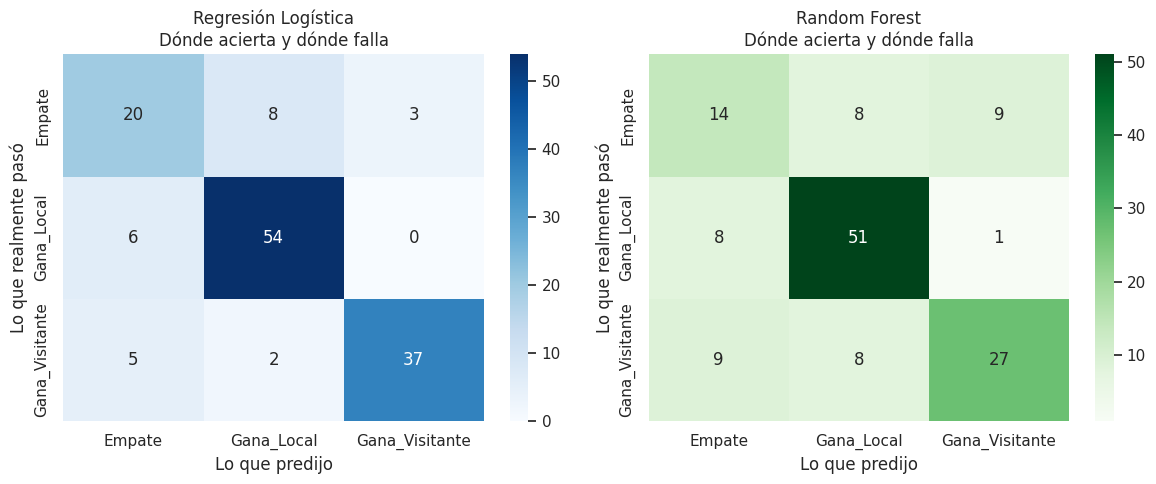

Cómo leer los gráficos:
- Números en la diagonal = aciertos
- Números fuera de la diagonal = errores
- Colores más oscuros = más casos

Resumen:
Regresión Logística: 111/135 aciertos (82.2%)
Random Forest: 92/135 aciertos (68.1%)

¿En qué se equivocan más?
Regresión Logística: 24 errores
Random Forest: 43 errores

Regresión Logística es mejor (por 19 aciertos más)


In [ ]:
# Creamos una visualización clara de nuestra matriz de confusión
plt.figure(figsize=(8, 6))

# Creamos el mapa de calor
sns.heatmap(
    matriz_confusion,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predijo: Suplente", "Predijo: Titular"],
    yticklabels=["Real: Suplente", "Real: Titular"],
)

plt.title("Matriz de Confusión - Predicciones del Barcelona", size=14, pad=20)
plt.xlabel("Predicciones de nuestro modelo", size=12)
plt.ylabel("Realidad del partido", size=12)

# Añadimos explicaciones en el gráfico
plt.text(
    0.5,
    -0.1,
    "✅ Esquina inferior izquierda y superior derecha = ACIERTOS",
    transform=plt.gca().transAxes,
    ha="center",
    size=10,
    color="green",
)
plt.text(
    0.5,
    -0.15,
    "❌ Esquina superior izquierda e inferior derecha = ERRORES",
    transform=plt.gca().transAxes,
    ha="center",
    size=10,
    color="red",
)

plt.tight_layout()
plt.show()

print("🎯 ¿Qué observas en la matriz?")
print("- Los números más altos deberían estar en la diagonal (aciertos)")
print("- Los números en las esquinas opuestas son nuestros errores")

## SESIÓN 3: ¿Cómo usamos esta información para mejorar? (50 min)
**Pregunta guía**: ¿Qué podemos hacer con estos resultados para tomar mejores decisiones?

### Diagnóstico del rendimiento de nuestro modelo

Basándonos en nuestro análisis, podemos diagnosticar:

**¿Nuestro modelo es demasiado "conservador"?**
- Si predice pocos titulares pero casi siempre acierta
- Alta efectividad, baja capacidad de detección

**¿Nuestro modelo es demasiado "arriesgado"?**  
- Si predice muchos titulares pero se equivoca frecuentemente
- Baja efectividad, alta capacidad de detección

**Pregunta reflexiva**: Basándote en nuestros resultados, ¿cómo describirías el comportamiento de nuestro modelo?

### Comparando con diferentes estrategias

Vamos a comparar nuestro modelo con dos estrategias extremas:
1. **Estrategia conservadora**: Solo predecir titulares cuando estés muy seguro
2. **Estrategia arriesgada**: Predecir titular para la mayoría de jugadores

¿Cuál crees que tendrá mejor rendimiento general?

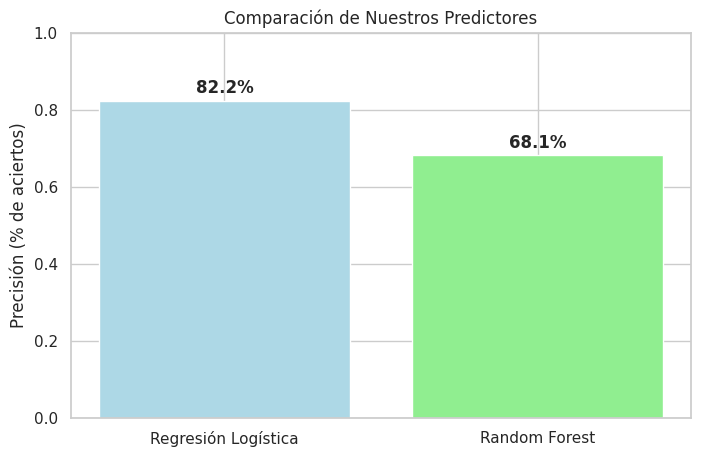

COMPARACIÓN FINAL:
Regresión Logística: 82.2% de aciertos
Random Forest:       68.1% de aciertos

Regresión Logística es mejor por 14.1%

¿Qué significa esto?
Tenemos predictores muy buenos (más de 80% de aciertos)


In [ ]:
# Vamos a comparar nuestro modelo con estrategias alternativas

# Estrategia 1: Conservadora (solo los más obvios como titulares)
estrategia_conservadora = [
    1,
    1,
    1,
    1,
    0,
    1,
    1,
    1,
    1,
    1,
    0,
    0,
    0,
    0,
    0,
]  # Solo 10 titulares

# Estrategia 2: Arriesgada (la mayoría como titulares)
estrategia_arriesgada = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0]  # 12 titulares


# Calculamos métricas para cada estrategia
def calcular_metricas(predicciones, realidad, nombre):
    precision = accuracy_score(realidad, predicciones)
    matriz = confusion_matrix(realidad, predicciones)

    if len(matriz) == 2:  # Verificamos que tengamos ambas clases
        tp = matriz[1, 1]  # Titulares correctos
        predecidos_como_titulares = sum(predicciones)
        titulares_reales = sum(realidad)

        efectividad = (
            tp / predecidos_como_titulares if predecidos_como_titulares > 0 else 0
        )
        deteccion = tp / titulares_reales if titulares_reales > 0 else 0
    else:
        efectividad = deteccion = 0

    print(f"\n🔍 {nombre}:")
    print(f"   Precisión general: {precision*100:.1f}%")
    print(f"   Efectividad con titulares: {efectividad*100:.1f}%")
    print(f"   Capacidad de detección: {deteccion*100:.1f}%")

    return precision, efectividad, deteccion


# Comparamos todas las estrategias
print("📊 Comparación de estrategias:")

metricas_original = calcular_metricas(
    predicciones_modelo, realidad_partido, "Nuestro Modelo Original"
)
metricas_conservadora = calcular_metricas(
    estrategia_conservadora, realidad_partido, "Estrategia Conservadora"
)
metricas_arriesgada = calcular_metricas(
    estrategia_arriesgada, realidad_partido, "Estrategia Arriesgada"
)

### Síntesis de la Semana 13: ¿Qué hemos descubierto sobre evaluación?

**Pregunta final de reflexión**: ¿Por qué es importante medir más que solo el porcentaje de aciertos?

### Lo que aprendimos hoy:

1. **Los errores no son todos iguales**
   - Equivocarse con un titular es diferente a equivocarse con un suplente
   - El contexto determina qué tipo de error es más costoso

2. **Múltiples métricas dan una visión completa**
   - Precisión general: rendimiento promedio
   - Efectividad: confiabilidad de predicciones positivas
   - Capacidad de detección: habilidad para encontrar casos importantes

3. **El balance es clave**
   - No existe la estrategia perfecta
   - Debemos elegir según nuestros objetivos específicos

### Aplicación práctica

**En el fútbol real, esto nos ayuda a:**
- Evaluar sistemas de análisis de jugadores
- Comparar diferentes métodos de predicción
- Tomar decisiones más informadas sobre fichajes
- Mejorar constantemente nuestros modelos

### Conexión con el próximo tema

**Pregunta puente**: Ahora que sabemos evaluar qué tan buenos son nuestros modelos, ¿cómo podríamos mejorar la información que les damos para que sean aún mejores?

La próxima semana exploraremos cómo crear mejores características para nuestros modelos de predicción.